# Image Segmentation for Person

### - A security camera for person detection by SegCaps.
####    - An extension from Capsules for Object Segmentation

This is a testing notebook on Google colaboratory.
Due to the model takes more memory than the environment, please just take this notebook as a reference.

The model cannot be trained on Google Colaboratory enviornment.
But you may inference the model on this environment.

### The section only required on Google colaboratory environment.

In [1]:
!ps -ef
!pwd

# # unmark below line to restart the instance / colaboratory service
# !kill -9 -1

UID        PID  PPID  C STIME TTY          TIME CMD
root         1     0  0 05:46 ?        00:00:00 /bin/bash -e /datalab/run.sh
root        69     1  5 05:47 ?        00:00:00 node /tools/node/bin/forever --m
root        79    69  6 05:47 ?        00:00:00 /tools/node/bin/node /datalab/we
root        89    79 12 05:47 ?        00:00:00 /usr/bin/python2 /usr/local/bin/
root        97    89 68 05:47 ?        00:00:04 /usr/bin/python3 -m ipykernel_la
root       117    97 99 05:47 pts/0    00:00:01 /bin/sh -c ps -ef
root       118   117  0 05:47 pts/0    00:00:00 ps -ef
/content


In [2]:
# Download necessary software
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse


# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()
# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


# Mount the disk
### Assume all you code put under google driver/Insight/code/

In [3]:
!mkdir -p drive
!google-drive-ocamlfuse -o nonempty drive
!pwd
!ls
!cd drive
!ls
import os
os.chdir("drive/Insight/code/")
!ls
!cp -R * ../../../
os.chdir("../../../")
!ls -rlt

/content
datalab  drive
datalab  drive
capsnet.py			     densenets.py     model_helper.py
capsule_layers.py		     imgs	      README.md
CapsulesForObjectSegmentation.ipynb  LICENSE	      requirements.txt
command.csh			     load_3D_data.py  subpixel_upscaling.py
custom_data_aug.py		     main.py	      test.py
custom_losses.py		     manip.py	      train.py
data				     metrics.py       unet.py
total 272
drwxr-xr-x 1 root root  4096 Jun 12 05:49 datalab
drwxr-xr-x 2 root root  4096 Jun 12 05:49 drive
-rw-r--r-- 1 root root 24514 Jun 12 05:49 CapsulesForObjectSegmentation.ipynb
-rw-r--r-- 1 root root 11558 Jun 12 05:49 LICENSE
-rw-r--r-- 1 root root  6673 Jun 12 05:49 README.md
-rw-r--r-- 1 root root 14392 Jun 12 05:49 capsnet.py
-rw-r--r-- 1 root root 15218 Jun 12 05:49 capsule_layers.py
-rw-r--r-- 1 root root   137 Jun 12 05:49 command.csh
-rw-r--r-- 1 root root  2469 Jun 12 05:50 custom_data_aug.py
-rw-r--r-- 1 root root  6773 Jun 12 05:50 custom_losses.py
drwxr-xr-x 4 root root  4096 Jun

# Install requirement packages.

In [4]:
!pip install -r ./requirements.txt

    100% |████████████████████████████████| 51kB 2.5MB/s 
    100% |████████████████████████████████| 41.0MB 1.2MB/s 


## Main Program Start from Here.

### Restrict memory usage of tensorflow

In [14]:
from keras.utils import print_summary
from keras import backend as K
import tensorflow as tf
# Assume that you have 12GB of GPU memory and want to allocate ~4GB:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)

sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

# Main program hook put into below:


### Training command
```bash
!python ./main.py --train 1 --test 0 --manip 0 --data_root_dir /content/data
```

### Testing command
```bash
!python ./main.py --train 0 --test 1 --manip 0 --data_root_dir /content/data --weights_path /content/data/saved_models/segcapsr3/Your_model_name.hdf5
```

### Manupulate contribution of capsules command
```bash
!python ./main.py --train 0 --test 0 --manip 1 --data_root_dir /content/data
```

In [ ]:
!python ./main.py --train 1 --test 0 --manip 0 --data_root_dir /content/data

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
Read image files.../content/data/imgs/1.3.6.1.4.1.14519.5.2.1.6279.6001.111172165674661221381920536987.mhd
Instructions for updating:
dim is deprecated, use axis instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
__________________________________________________________________________________________________
Layer (type)                         Output Shape              Param #   Connected to             
input_1 (InputLayer)                 (None, 512, 512, 1)       0                                  
__________________________________________________________________________________________________
conv1 (Conv2D)                 

In [6]:

!ls
!cp -R ./data/* ./drive/Insight/code/data/


capsnet.py			     densenets.py     model_helper.py
capsule_layers.py		     drive	      __pycache__
CapsulesForObjectSegmentation.ipynb  imgs	      README.md
command.csh			     LICENSE	      requirements.txt
custom_data_aug.py		     load_3D_data.py  subpixel_upscaling.py
custom_losses.py		     main.py	      test.py
data				     manip.py	      train.py
datalab				     metrics.py       unet.py


### Explore results or images on specific folder.

In [60]:
os.chdir("/content/")
#os.chdir("/content/data/results/segcapsr3/split_0/")
!pwd
!ls -rlt

from IPython.display import Image
#Image("/content/data/results/segcapsr3/split_0/qual_figs/1.3.6.1.4.1.14519.5.2.1.6279.6001.108197895896446896160048741492_qual_fig.png")

/content
total 2664
drwxr-xr-x  1 root root    4096 Jun 11 23:11 datalab
drwxr-xr-x  2 root root    4096 Jun 11 23:14 drive
drwxr-xr-x  2 root root    4096 Jun 11 23:17 imgs
-rw-r--r--  1 root root 2435002 Jun 12 02:30 SegCaps-master.zip
-rw-r--r--  1 root root   30629 Jun 12 02:36 CapsulesForObjectSegmentation.ipynb
-rw-r--r--  1 root root   11558 Jun 12 02:36 LICENSE
-rw-r--r--  1 root root    6673 Jun 12 02:36 README.md
-rw-r--r--  1 root root   14392 Jun 12 02:36 capsnet.py
-rw-r--r--  1 root root   15218 Jun 12 02:36 capsule_layers.py
-rw-r--r--  1 root root     137 Jun 12 02:36 command.csh
-rw-r--r--  1 root root    2469 Jun 12 02:36 custom_data_aug.py
-rw-r--r--  1 root root    6773 Jun 12 02:36 custom_losses.py
-rw-r--r--  1 root root   49534 Jun 12 02:38 densenets.py
-rw-r--r--  1 root root   20303 Jun 12 02:38 load_3D_data.py
-rw-r--r--  1 root root    8940 Jun 12 02:38 main.py
-rw-r--r--  1 root root    3920 Jun 12 02:38 manip.py
-rw-r--r--  1 root root   40805 Jun 12 02:38 

### Testing result based on trained weight
#### Reference of CT image file and display code
https://www.kaggle.com/arnavkj95/candidate-generation-and-luna16-preprocessing

original pictures


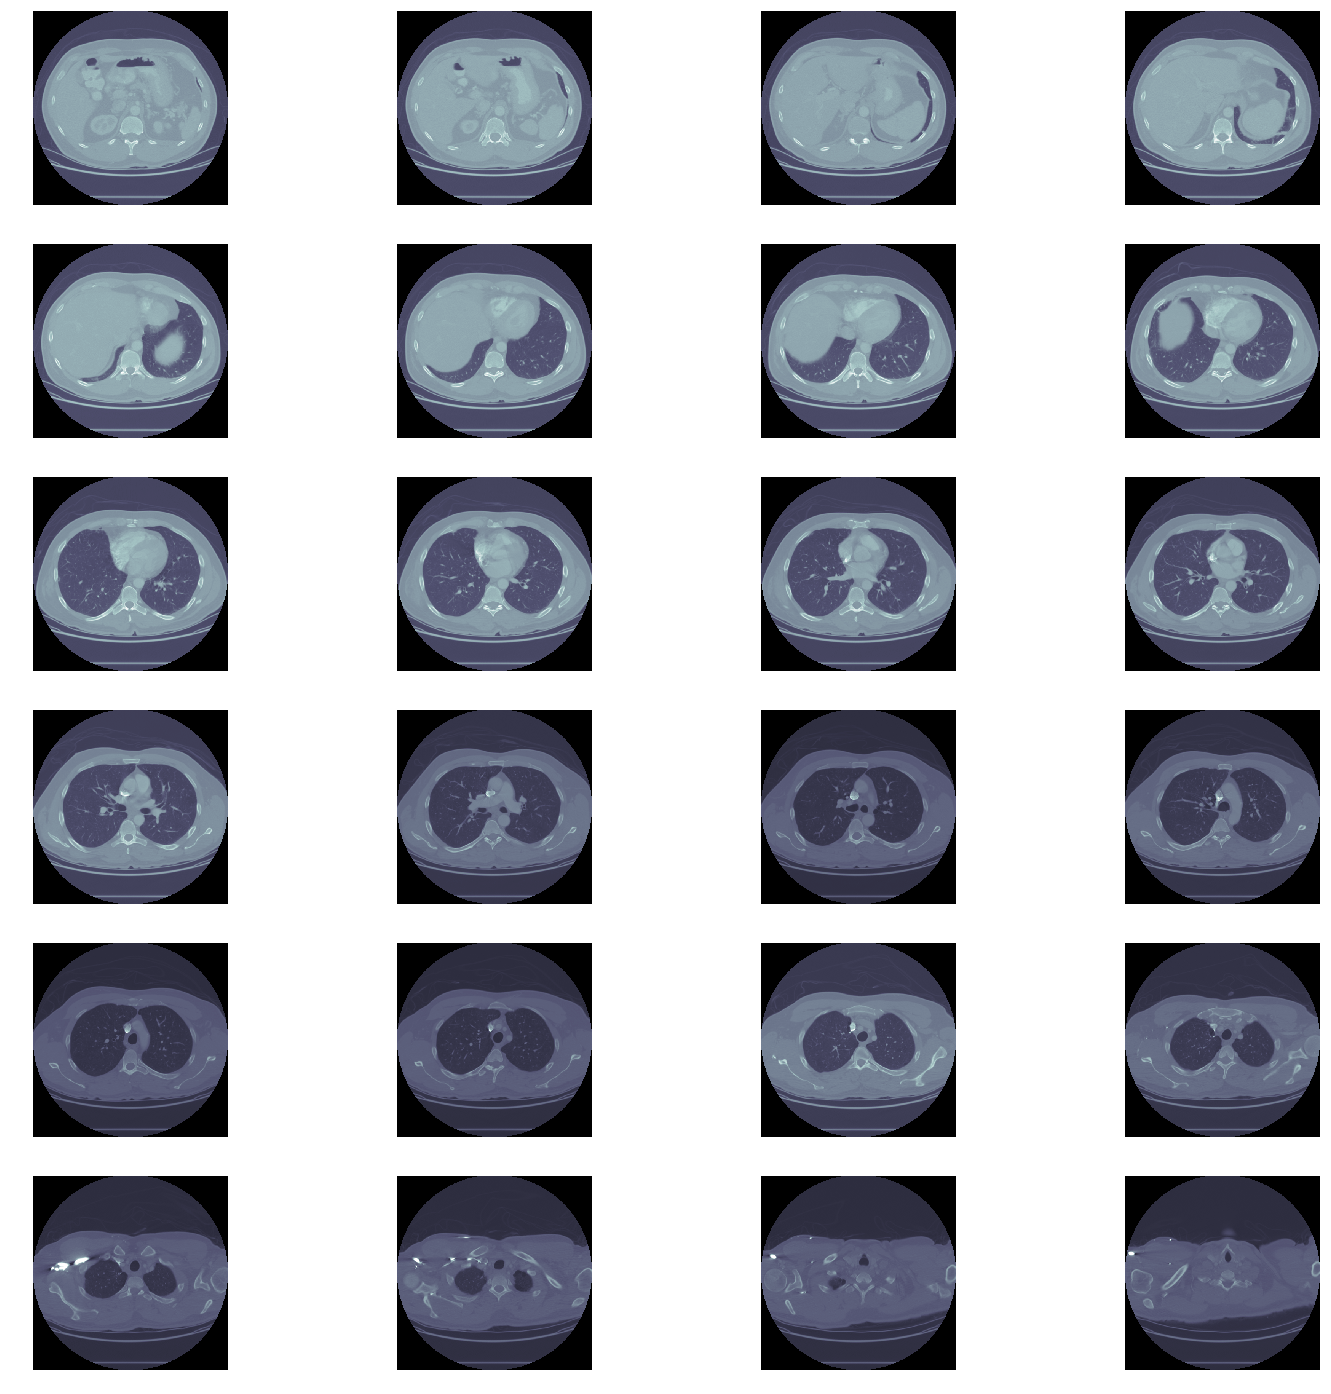

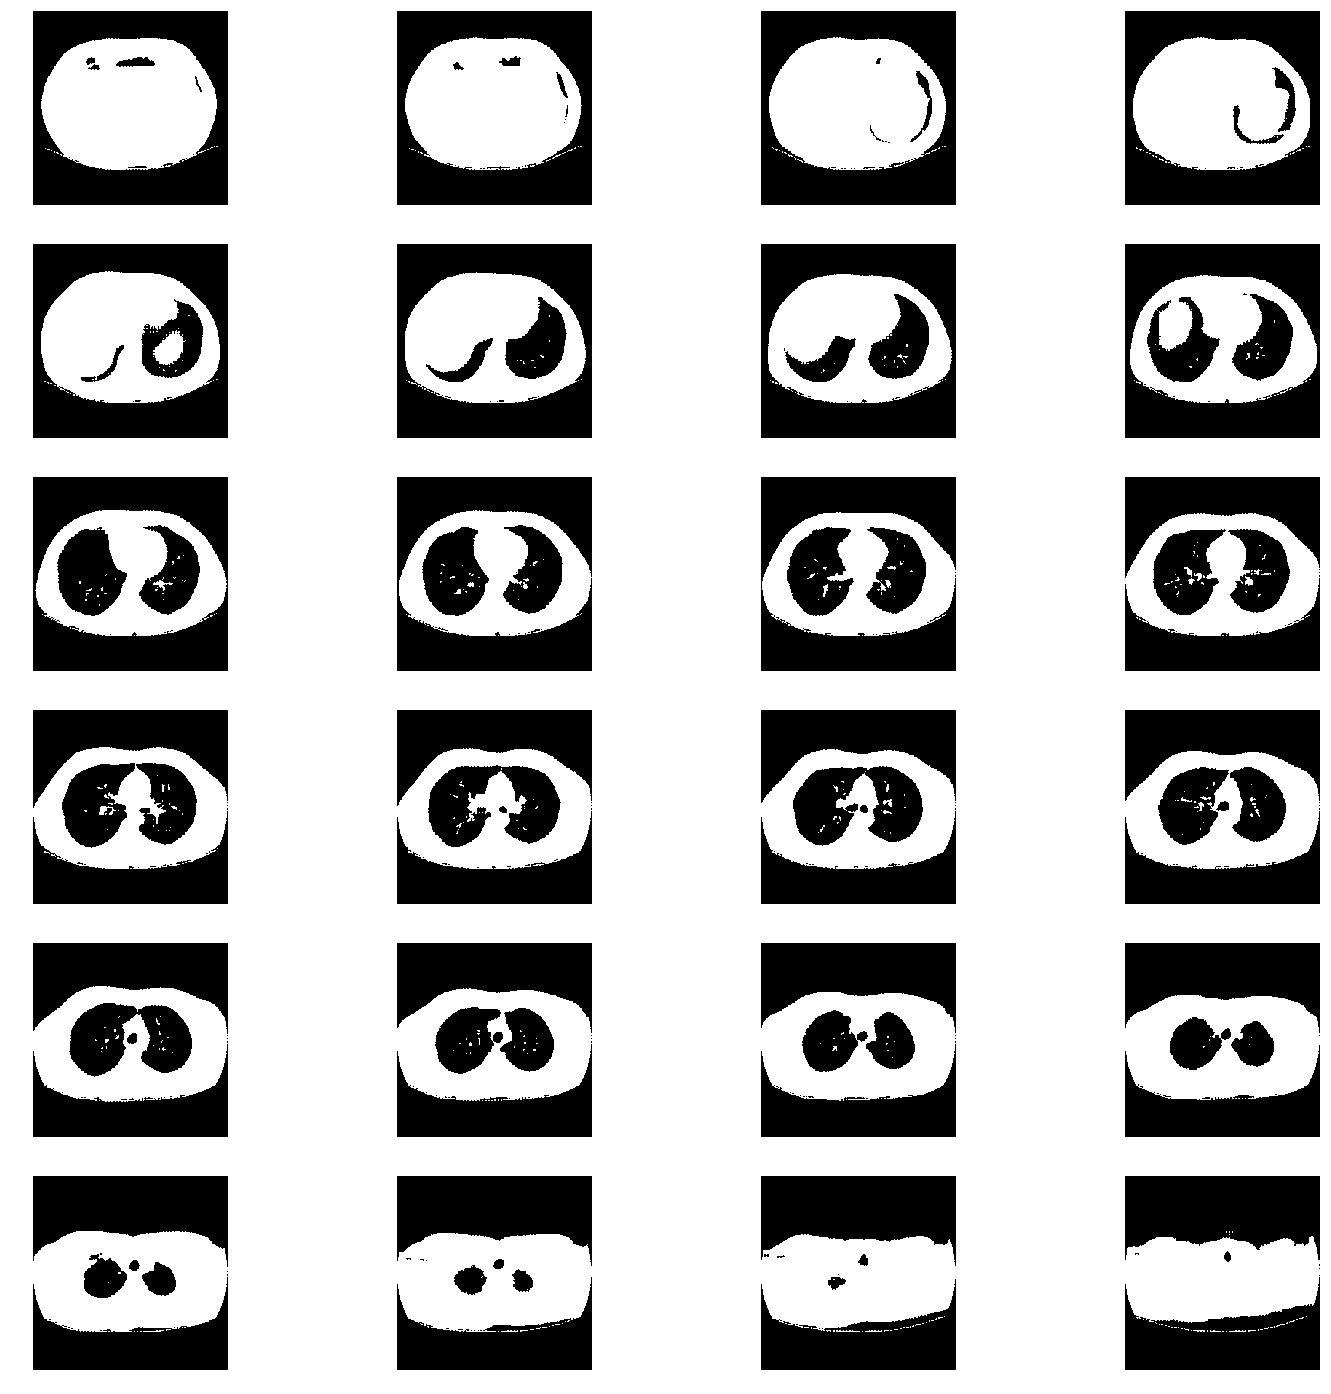

In [12]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

'''
This funciton reads a '.mhd' file using SimpleITK and return the image array, origin and spacing of the image.
'''

def load_itk(filename):
    # Reads the image using SimpleITK
    itkimage = sitk.ReadImage(filename)
    
    #Convert the image to a  numpy array first and then shuffle the dimensions to get axis in the order z,y,x
    
    ct_scan = sitk.GetArrayFromImage(itkimage)

    # Read the origin of the ct_scan, will be used to convert the coordinates from world to voxel and vice versa.
    origin = np.array(list(reversed(itkimage.GetOrigin())))

    # Read the spacing along each dimension
    spacing = np.array(list(reversed(itkimage.GetSpacing())))

    return ct_scan, origin, spacing

def plot_ct_scan(scan):
    f, plots = plt.subplots(int(scan.shape[0] / 20) + 1, 4, figsize=(25, 25))
    for i in range(0, scan.shape[0], 5):
        plots[int(i / 20), int((i % 20) / 5)].axis('off')
        plots[int(i / 20), int((i % 20) / 5)].imshow(scan[i], cmap=plt.cm.bone)

ct_scan_i, origin_i, spacing_i = load_itk('/media/clark/Windows/Users/Clark/git/SegCaps/data/imgs/1.3.6.1.4.1.14519.5.2.1.6279.6001.108197895896446896160048741492.mhd')
# plot after test image 
print('original pictures')
plot_ct_scan(ct_scan_i)
# plot_ct_scan(origin_i)

ct_scan, origin, spacing = load_itk('/media/clark/Windows/Users/Clark/git/SegCaps/data/results/segcapsr3/split_0/final_output/1.3.6.1.4.1.14519.5.2.1.6279.6001.108197895896446896160048741492_final_output.mhd')
# plot after test image 
plot_ct_scan(ct_scan)
# plot_ct_scan(origin)





# Next Step:
## Integrate with COCO Stuff 2017 dataset
### URL
https://github.com/nightrome/cocostuff